# Learning to Control Indoor Air Temperature in Buildings

This tutorial demonstrates the use of [Differentiable predictive control (DPC)](https://www.sciencedirect.com/science/article/pii/S0959152422000981) method to learn constrained neural policy for controlling indoor air temperature in a residential building model.


## Building Thermal Comfort Control

Buildings today contribute to roughly 40% of the global energy use (approx. 64 PWh), of which a large portion is used for [heating, cooling, ventilation, and air-conditioning (HVAC)](https://en.wikipedia.org/wiki/Heating,_ventilation,_and_air_conditioning) [4]. It has been demonstrated that advanced building control, like [model predictive control (MPC)](https://en.wikipedia.org/wiki/Model_predictive_control)
or [deep reinforcement learning (DRL)](https://en.wikipedia.org/wiki/Deep_reinforcement_learning), can notably reduce the energy use and mitigate greenhouse gas emissions. However, despite intensive research efforts, the practical applications are still in the early stages. One of these challenges is the complexity of the optimal control technology to be deployed in the current predominantly rule-based [building automation systems](https://en.wikipedia.org/wiki/Building_automation).

**Schematics of a Building Control Scheme**:  
A simplified schematics of a building control scheme governed by advanced control algorithm is given as follows:
<img src="./figs/building_control.PNG" width="500">  

Here the optimization algorithm (MPC or DRL) takes in the measurements of the building and based on the objective criteria
decides optimal control actions for governing the building's HVAC system. For more details about typical measurements, objective criteria, and system constraints we refer the reader to the reference [4].

**Control ojective**:   
The objective is to control the heating system in the building to achieve desired reference values for indoor air temperature while minimizing the energy use.
In this tutorial we will demonstrate the use of new [differentiable programming-based](https://en.wikipedia.org/wiki/Differentiable_programming) control methodology for optimizing the building energy use while satisfying [thermal comfort](https://en.wikipedia.org/wiki/Thermal_comfort) constraints. 


## Differentiable Predictive Control 

[Differentiable predictive control (DPC)](https://www.sciencedirect.com/science/article/pii/S0959152422000981) is a model-based offline policy optimization algorithm for learning constrained control policies for dynamical systems.

**Schematics of the Differentiable Predictive Control method**:  
<img src="../control/figs/DPC_simple_method.png" width="600">  

**Neural control policy**:  
The objective of this tutorial is to learn neural control policy $u_k = \pi(x_k, R)$ to control the tank levels by modulating the pump and valve control actions $u_k = [p_k, v_k]$. The policy takes in the measurements of system states $x_k$ at thime $k$, prediciton of desired references $R = [r_k, ..., r_{k+N}]$ over pre-defined horizon $N$.

**Differentiable system model**:  
The DPC is a model-based policy optimization algorithm, that exploits the differentiability of a wide class of model representations for dynamical systems, including differential equations, state-space models, or various neural network architectures. In this example, we compactly represent the system model by ODE equations  $\text{ODESolve}(f(x^i_k, u^i_k))$  describing the governing dynamics of the controlled system. 

**Differentiable predictive control problem formulation**:  
We learn the explicit neural control policy by solving the following parametric optimal control problem: 
$$
\begin{align}
&\underset{\theta}{\text{minimize}}     && \sum_{i=1}^m  \Big( \sum_{k=1}^{N-1} Q_x||x^i_k - r^i_k||_2^2  + Q_N||x^i_N - r^i_N||_2^2 \Big) \\
&\text{subject to}    && x^i_{k+1} =  \text{ODESolve}(f(x^i_k, u^i_k)) \\
&                     && u^i_k = \pi_{\theta}(x^i_k, R^i) \\
&                     && 0 \le x^i_k \le 1 \\
&                     && 0 \le u^i_k \le 1 \\
&                     && x^i_0 \sim \mathcal{P}_{x_0} \\
&                     && R^i \sim  \mathcal{P}_R
\end{align}
$$  
The objective function is to minimize the reference tracking error $||x^i_k - r^i_k||_2^2$ over pre-defined prediction horizon $N$ weighted by a scalar $Q_x$, including terminal penalty weighted by $Q_N$.  The parametric neural control policy is given by $\pi_{\theta}(x^i_k, R^i)$. The neural control policy is optimized over a problem parameters sampled from the distributions $\mathcal{P}_{x_0}$, and $\mathcal{P}_R$, for state initial conditions, and references, respectively. The parameters $\theta$ are optimized with stochastic gradient descent.


### Differentiable Control References
[1] [Ján Drgoňa, Karol Kiš, Aaron Tuor, Draguna Vrabie, Martin Klaučo,
Differentiable predictive control: Deep learning alternative to explicit model predictive control for unknown nonlinear systems,
Journal of Process Control, Volume 116, 2022](https://www.sciencedirect.com/science/article/pii/S0959152422000981)  
[2] [Jan Drgona, Aaron Tuor, Draguna Vrabie, Learning Constrained Adaptive Differentiable Predictive Control Policies With Guarantees, 2020, arXiv:2004.11184](https://arxiv.org/abs/2004.11184)  
[3] [Ján Drgoňa, Aaron Tuor, Elliott Skomski, Soumya Vasisht, Draguna Vrabie,
Deep Learning Explicit Differentiable Predictive Control Laws for Buildings,
IFAC-PapersOnLine,
Volume 54, Issue 6,
2021](https://www.sciencedirect.com/science/article/pii/S2405896321012933)


### Related Building Control References
[4] [Ján Drgoňa, Javier Arroyo, Iago Cupeiro Figueroa, David Blum, Krzysztof Arendt, Donghun Kim, Enric Perarnau Ollé, Juraj Oravec, Michael Wetter, Draguna L. Vrabie, Lieve Helsen,
All you need to know about model predictive control for buildings,
Annual Reviews in Control,
Volume 50,
2020](https://www.sciencedirect.com/science/article/pii/S1367578820300584)  
[5] [Ján Drgoňa, Damien Picard, Lieve Helsen,
Cloud-based implementation of white-box model predictive control for a GEOTABS office building: A field test demonstration,
Journal of Process Control,
Volume 88,
2020](https://www.sciencedirect.com/science/article/pii/S0959152419306857)  
[6] [Zoltan Nagy, Gregor Henze, Sourav Dey, Javier Arroyo, Lieve Helsen, Xiangyu Zhang, Bingqing Chen, Kadir Amasyali, Kuldeep Kurte, Ahmed Zamzam, Helia Zandi, Ján Drgoňa, Matias Quintana, Steven McCullogh, June Young Park, Han Li, Tianzhen Hong, Silvio Brandi, Giuseppe Pinto, Alfonso Capozzoli, Draguna Vrabie, Mario Bergés, Kingsley Nweye, Thibault Marzullo, Andrey Bernstein,
Ten questions concerning reinforcement learning for building energy management,
Building and Environment,
Volume 241,
2023](https://www.sciencedirect.com/science/article/abs/pii/S0360132323004626)  
[7] [Bingqing Chen, Priya L. Donti, Kyri Baker, J. Zico Kolter, and Mario Bergés. 2021. Enforcing Policy Feasibility Constraints through Differentiable Projection for Energy Optimization. In Proceedings of the Twelfth ACM International Conference on Future Energy Systems (e-Energy '21)](https://dl.acm.org/doi/abs/10.1145/3447555.3464874)  
[8] [Jan Široký, Frauke Oldewurtel, Jiří Cigler, Samuel Prívara,
Experimental analysis of model predictive control for an energy efficient building heating system,
Applied Energy,
Volume 88, Issue 9,
2011](https://www.sciencedirect.com/science/article/pii/S0306261911001668)





## NeuroMANCER and Dependencies

### Install (Colab only)
Skip this step when running locally.

In [ ]:
!pip install neuromancer

*Note: When running on Colab, one might encounter a pip dependency error with Lida 0.0.10. This can be ignored*

In [13]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import numpy as np
from matplotlib.lines import Line2D

import neuromancer.psl as psl
from neuromancer.system import Node, System
from neuromancer.modules import blocks
from neuromancer.dataset import DictDataset
from neuromancer.constraint import variable
from neuromancer.loss import PenaltyLoss
from neuromancer.problem import Problem
from neuromancer.trainer import Trainer
from neuromancer.plot import pltCL

## System model to be controlled

In [14]:
# ground truth system model
sys = psl.systems['LinearSimpleSingleZone']()

# problem dimensions
nx = sys.nx           # number of states
nu = sys.nu           # number of control inputs
nd = sys.nD           # number of disturbances
nd_obs = sys.nD_obs   # number of observable disturbances
ny = sys.ny           # number of controlled outputs
nref = ny             # number of references

# control action bounds
umin = torch.tensor(sys.umin)
umax = torch.tensor(sys.umax)


## Training dataset generation

For a training dataset we randomly sample initial conditions of states, sequence of desired thermal comfort levels, and sequence of observed system disturbances over predefined prediction horizon from given distributions $\mathcal{P}_{x_0}$, $\mathcal{P}_R$, and $\mathcal{P}_D$ respectively.

In [15]:
def get_data(sys, nsteps, n_samples, xmin_range, batch_size, name="train"):
    #  sampled references for training the policy
    batched_xmin = xmin_range.sample((n_samples, 1, nref)).repeat(1, nsteps + 1, 1)
    batched_xmax = batched_xmin + 2.

    # sampled disturbance trajectories from the simulation model
    batched_dist = torch.stack([torch.tensor(sys.get_D(nsteps)) for _ in range(n_samples)])

    # sampled initial conditions
    batched_x0 = torch.stack([torch.tensor(sys.get_x0()).unsqueeze(0) for _ in range(n_samples)])

    data = DictDataset(
        {"x": batched_x0,
         "y": batched_x0[:,:,[-1]],
         "ymin": batched_xmin,
         "ymax": batched_xmax,
         "d": batched_dist},
        name=name,
    )

    return DataLoader(data, batch_size=batch_size, collate_fn=data.collate_fn, shuffle=False)

In [16]:
nsteps = 100  # prediction horizon
n_samples = 1000    # number of sampled scenarios
batch_size = 100

# range for lower comfort bound
xmin_range = torch.distributions.Uniform(18., 22.)

train_loader, dev_loader = [
    get_data(sys, nsteps, n_samples, xmin_range, batch_size, name=name)
    for name in ("train", "dev")
]

## Partially observable white-box system model and control policy

In this model-based policy optimization scenario we assume we have access to the following discrete-time partially observable lnear [state space model (SSM)](https://en.wikipedia.org/wiki/State-space_representation) representing building thermal dynamics:    
$$
x_{k+1} = Ax_k + Bu_k + Ed_k\\
y_k = Cx_k
$$
where $x_k$ represent system states (building temperatures), $u_k$ are control actions governing the HVAC system (mass flow and supply temperature), $d_k$ are disturbances affecting the system (ambient temperature, solar irradiation, occupancy), and $y_k$ is the measured variable to be controlled (indoor air temperature).

In [17]:
# extract exact state space model matrices:
A = torch.tensor(sys.A)
B = torch.tensor(sys.Beta)
C = torch.tensor(sys.C)
E = torch.tensor(sys.E)

In [18]:
# state-space model of the building dynamics:
#   x_k+1 =  A x_k + B u_k + E d_k
xnext = lambda x, u, d: x @ A.T + u @ B.T + d @ E.T
state_model = Node(xnext, ['x', 'u', 'd'], ['x'], name='SSM')

#   y_k = C x_k
ynext = lambda x: x @ C.T
output_model = Node(ynext, ['x'], ['y'], name='y=Cx')

# partially observable disturbance model
dist_model = lambda d: d[:, sys.d_idx]
dist_obs = Node(dist_model, ['d'], ['d_obs'], name='dist_obs')

Next we parametrize the control policy using deep neural networks given as:  
$$u_k = \pi_{\theta}(y_k, R, D)$$
where $y_k$ is the indoor air temperature to be controlled, $R = \{y_{min}, y_{max}\}$ are desired comfort levels of the indoor air temperature, and $D$ is observed disturbance (ambient air temperature).

In [19]:
# neural net control policy
net = blocks.MLP_bounds(
    insize=ny + 2*nref + nd_obs,
    outsize=nu,
    hsizes=[32, 32],
    nonlin=nn.GELU,
    min=umin,
    max=umax,
)
policy = Node(net, ['y', 'ymin', 'ymax', 'd_obs'], ['u'], name='policy')

Now having the partially observable system model and control policy we construct differentiable closed-loop system model.

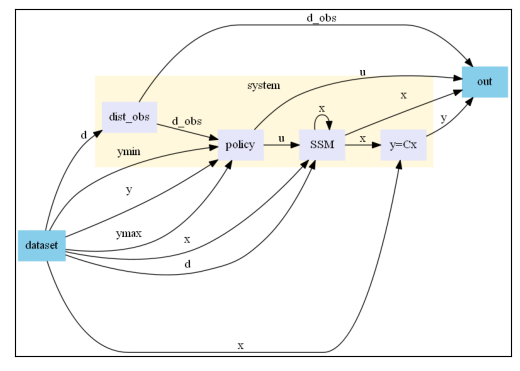

In [20]:
# closed-loop system model
cl_system = System([dist_obs, policy, state_model, output_model],
                    nsteps=nsteps,
                    name='cl_system')
cl_system.show()

## Differentiable Predictive Control objectives and constraints

Once we have the closed-loop system model, we define the desired control objectives, i.e. energy minimizaiton, to be optimized while satisfying the thermal comfort constraints. 

In [21]:
# variables
y = variable('y')
u = variable('u')
ymin = variable('ymin')
ymax = variable('ymax')

In [22]:
# objectives
action_loss = 0.01 * (u == 0.0)  # energy minimization
du_loss = 0.1 * (u[:,:-1,:] - u[:,1:,:] == 0.0)  # delta u minimization to prevent agressive changes in control actions

# thermal comfort constraints
state_lower_bound_penalty = 50.*(y > ymin)
state_upper_bound_penalty = 50.*(y < ymax)

# objectives and constraints names for nicer plot
action_loss.name = 'action_loss'
du_loss.name = 'du_loss'
state_lower_bound_penalty.name = 'x_min'
state_upper_bound_penalty.name = 'x_max'

# list of constraints and objectives
objectives = [action_loss, du_loss]
constraints = [state_lower_bound_penalty, state_upper_bound_penalty]

## Differentiable optimal control problem 

Now we put all the components together to construct differentiable optimal control problem to be optimized end-to-end over the distribution of training scenarios.

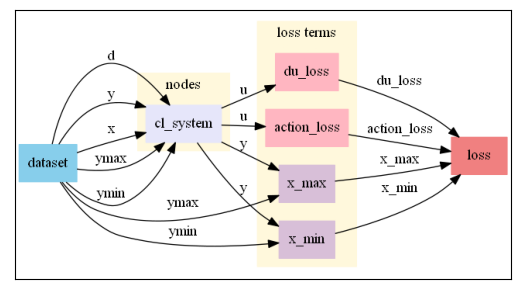

In [23]:
# data (x_k, r_k) -> parameters (xi_k) -> policy (u_k) -> dynamics (x_k+1)
nodes = [cl_system]
# create constrained optimization loss
loss = PenaltyLoss(objectives, constraints)
# construct constrained optimization problem
problem = Problem(nodes, loss)
# plot computational graph
problem.show()

## Solve the problem

We solve the problem, i.e. training the neural control policy, by using stochastic gradient descent over pre-defined training data of sampled problem scenarios.

In [24]:
optimizer = torch.optim.AdamW(problem.parameters(), lr=0.001)
#  Neuromancer trainer
trainer = Trainer(
    problem,
    train_loader,
    dev_loader,
    optimizer=optimizer,
    epochs=200,
    train_metric='train_loss',
    eval_metric='dev_loss',
    warmup=200,
)

In [25]:
# Train control policy
best_model = trainer.train()
# load best trained model
trainer.model.load_state_dict(best_model)

C:\Users\faul215\AppData\Roaming\Python\Python39\site-packages\neuromancer\constraint.py:160: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([100, 100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.l1_loss(left, right)
C:\Users\faul215\AppData\Roaming\Python\Python39\site-packages\neuromancer\constraint.py:160: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([100, 99, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.l1_loss(left, right)


epoch: 0  train_loss: 50.0561408996582
epoch: 1  train_loss: 39.851505279541016
epoch: 2  train_loss: 38.67194747924805
epoch: 3  train_loss: 36.50129699707031
epoch: 4  train_loss: 34.647403717041016
epoch: 5  train_loss: 32.670352935791016
epoch: 6  train_loss: 31.44736671447754
epoch: 7  train_loss: 30.292938232421875
epoch: 8  train_loss: 29.34060287475586
epoch: 9  train_loss: 28.425561904907227
epoch: 10  train_loss: 27.673025131225586
epoch: 11  train_loss: 27.086925506591797
epoch: 12  train_loss: 26.629344940185547
epoch: 13  train_loss: 26.299850463867188
epoch: 14  train_loss: 26.055068969726562
epoch: 15  train_loss: 25.87018394470215
epoch: 16  train_loss: 25.73293113708496
epoch: 17  train_loss: 25.621450424194336
epoch: 18  train_loss: 25.524368286132812
epoch: 19  train_loss: 25.43410873413086
epoch: 20  train_loss: 25.351163864135742
epoch: 21  train_loss: 25.272031784057617
epoch: 22  train_loss: 25.19174575805664
epoch: 23  train_loss: 25.114164352416992
epoch: 24  t

<All keys matched successfully>

## Evaluate best model on a closed loop system rollout

In [26]:
nsteps_test = 2000

# generate reference
np_refs = psl.signals.step(nsteps_test+1, 1, min=18., max=22., randsteps=5)
ymin_val = torch.tensor(np_refs, dtype=torch.float32).reshape(1, nsteps_test+1, 1)
ymax_val = ymin_val+2.0
# generate disturbance signal
torch_dist = torch.tensor(sys.get_D(nsteps_test+1)).unsqueeze(0)
# initial data for closed loop simulation
x0 = torch.tensor(sys.get_x0()).reshape(1, 1, nx)
data = {'x': x0,
        'y': x0[:, :, [-1]],
        'ymin': ymin_val,
        'ymax': ymax_val,
        'd': torch_dist}
cl_system.nsteps = nsteps_test
# perform closed-loop simulation
trajectories = cl_system(data)

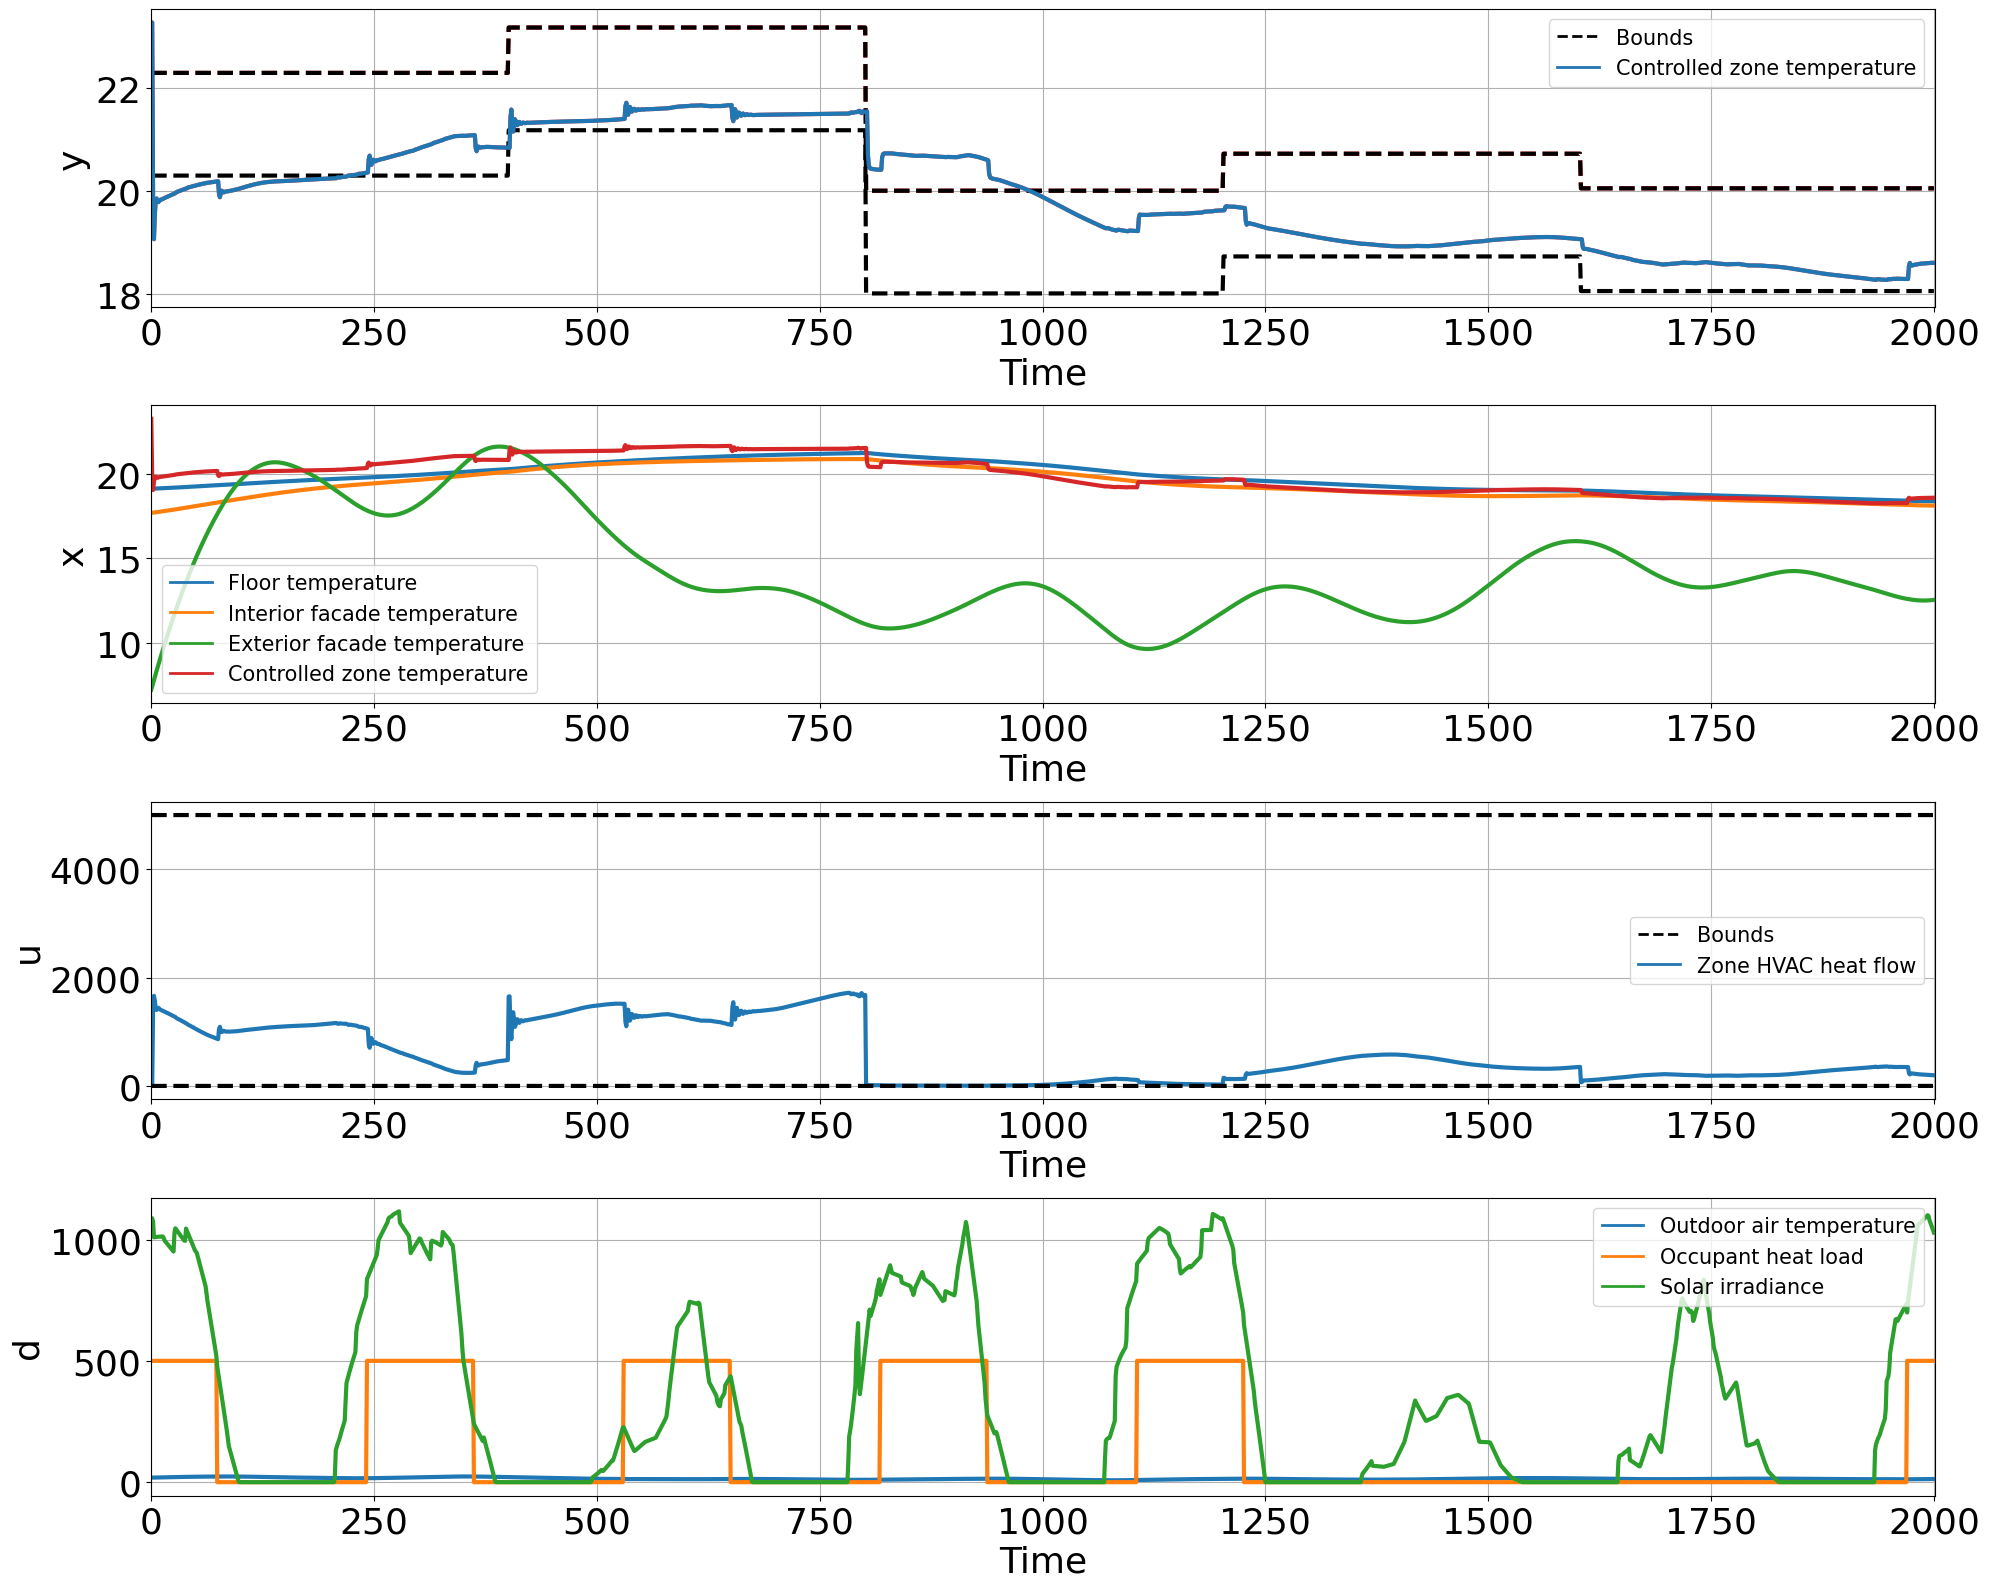

In [29]:
from matplotlib.lines import Line2D
# constraints bounds
Umin = umin * np.ones([nsteps_test, nu])
Umax = umax * np.ones([nsteps_test, nu])
Ymin = trajectories['ymin'].detach().reshape(nsteps_test+1, nref)
Ymax = trajectories['ymax'].detach().reshape(nsteps_test+1, nref)
# plot closed loop trajectories
fig, ax = pltCL(Y=trajectories['y'].detach().reshape(nsteps_test+1, ny),
        R=Ymax,
        X=trajectories['x'].detach().reshape(nsteps_test+1, nx),
        D=trajectories['d'].detach().reshape(nsteps_test+1, nd),
        U=trajectories['u'].detach().reshape(nsteps_test, nu),
        Umin=Umin, Umax=Umax, Ymin=Ymin, Ymax=Ymax)
# add custom legends to plots
custom_lines = [Line2D([0], [0], color='k', lw=2, linestyle='--'),
                    Line2D([0], [0], color='tab:blue', lw=2, linestyle='-')]
custom_lines_x = [Line2D([0], [0], color='tab:blue', lw=2, linestyle='-'),
                    Line2D([0], [0], color='tab:orange', lw=2, linestyle='-'),
                    Line2D([0], [0], color='tab:green', lw=2, linestyle='-'),
                    Line2D([0], [0], color='tab:red', lw=2, linestyle='-')]
custom_lines_d = [Line2D([0], [0], color='tab:blue', lw=2, linestyle='-'),
                    Line2D([0], [0], color='tab:orange', lw=2, linestyle='-'),
                    Line2D([0], [0], color='tab:green', lw=2, linestyle='-')]
ax[0, 0].legend(custom_lines, ['Bounds', 'Controlled zone temperature'], fontsize=15, loc="best")
ax[1, 0].legend(custom_lines_x, ['Floor temperature', 'Interior facade temperature', 'Exterior facade temperature', 'Controlled zone temperature'], fontsize=15, loc="best")
ax[2, 0].legend(custom_lines, ['Bounds', 'Zone HVAC heat flow'], fontsize=15, loc="best")
ax[3, 0].legend(custom_lines_x, ['Outdoor air temperature', 'Occupant heat load', 'Solar irradiance'], fontsize=15, loc="best")
